## Rozdział 6.

### Projekt - Artur Stolarczyk

----------------------------------

#### 1. Generowanie danych

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#style wykresów
#plt.style.use('seaborn')

# Ustawienie ziarna losowości dla powtarzalności wyników
#np.random.seed(42)

#liczba dni w roku
num_days = 365

# Generowanie danych
temperatura = np.random.uniform(-10, 35, num_days)
wilgotnosc = np.random.uniform(0, 100, num_days)
opady = np.random.uniform(0, 50, num_days)
predkosc_wiatru = np.random.uniform(0, 100, num_days)
kierunek_wiatru = np.random.uniform(0, 360, num_days)

#dane = np.colum

# Tworzenie tablicy 
dane = np.column_stack((temperatura, wilgotnosc, opady, predkosc_wiatru, kierunek_wiatru))

# Tworzenie DataFrame
kolumny = ['Temperatura', 'Wilgotność', 'Opady', 'Prędkość wiatru', 'Kierunek wiatru']
df = pd.DataFrame(dane, columns=kolumny)

# Dodanie kolumny 'Dzień'
df['Dzień'] = np.arange(1, num_days + 1)

# Ustawienie kolumny 'Dzień' jako indeksu
df.set_index('Dzień', inplace=True)

# Wyświetlenie pierwszych 5 wierszy
df.head()



,Temperatura,Wilgotność,Opady,Prędkość wiatru,Kierunek wiatru
Dzień,,,,,
1,27.763923,5.473791,18.273194,18.153267,30.448293
2,-3.625457,24.745819,11.650688,71.235969,134.370639
3,28.011525,93.658899,38.689833,89.989918,312.076381
4,11.060792,65.371259,6.422013,82.173444,229.975024
5,5.625292,22.709816,23.613730,7.253299,93.816981


#### 2. Analiza danych

##### 2.1 Obliczanie średniej temperatury w całym roku i dla poszczególnych pór roku

In [149]:
def pora_roku(dzien):
    if dzien in range(80, 172):     # Wiosna (21 marca - 20 czerwca)
        return 'Wiosna'
    elif dzien in range(172, 265):  # Lato (21 czerwca - 22 września)
        return 'Lato'
    elif dzien in range(265, 355):  # Jesień (23 września - 20 grudnia)
        return 'Jesień'
    else:  # Zima
        return 'Zima'

#dodanie kolumny pora roku
df['Pora roku'] = df.index.map(pora_roku)

# Obliczanie średniej temperatury
srednia_temp_calosc = df['Temperatura'].mean()
print(f"Średnia temperatura w całym roku: {srednia_temp_calosc:.2f}°C")

# Średnia temperatura dla poszczególnych pór roku
srednia_temp_pory_roku = df.groupby('Pora roku')['Temperatura'].mean()
print("\nŚrednia temperatura dla poszczególnych pór roku:")
print(srednia_temp_pory_roku)


Średnia temperatura w całym roku: 10.68°C

Średnia temperatura dla poszczególnych pór roku:
Pora roku
Jesień    10.849764
Lato      10.319630
Wiosna    10.603848
Zima      10.980291
Name: Temperatura, dtype: float64


##### 2.2 Znalezienie dnia z najwyższą i najniższą temperaturą

In [150]:
# Dzień z najwyższa temperaturą
max_temp = df['Temperatura'].max()
dzien_max_temp = df['Temperatura'].idxmax()
print(f"\nNajwyższa temperatura wynosiła {max_temp:.2f}°C i wystąpiła w dniu {dzien_max_temp}.")

# Dzień z najniższą temperaturą
min_temp = df['Temperatura'].min()
dzien_min_temp = df['Temperatura'].idxmin()
print(f"Najniższa temperatura wynosiła {min_temp:.2f}°C i wystąpiła w dniu {dzien_min_temp}.")


Najwyższa temperatura wynosiła 34.99°C i wystąpiła w dniu 294.
Najniższa temperatura wynosiła -9.99°C i wystąpiła w dniu 39.


##### 2.3 Oblicz sumę opadów dla całego roku oraz dla każdej pory roku.

In [151]:
# SUma opadów dla całego roku
suma_opadow = df['Opady'].sum()
print(f"\nSuma opadów w całym roku: {suma_opadow:.2f} mm")

suma_opadow_pora_roku = df.groupby('Pora roku')['Opady'].sum()
print("\nSuma opadów dla poszczególnych pór roku:")
print(suma_opadow_pora_roku)



Suma opadów w całym roku: 9210.12 mm

Suma opadów dla poszczególnych pór roku:
Pora roku
Jesień    2116.464675
Lato      2269.868169
Wiosna    2534.760426
Zima      2289.028640
Name: Opady, dtype: float64


##### 2.4 Oblicz średnią prędkość wiatru i wilgotność dla całego roku.

In [152]:
# Średnia prędkość wiatru
srednia_predkosc_wiatru = df['Prędkość wiatru'].mean()
print(f"\nŚrednia prędkość wiatru w całym roku: {srednia_predkosc_wiatru:.2f} km/h")

# Średnia wilgotność
srednia_wilgotnosc = df['Wilgotność'].mean()
print(f"Średnia wilgotność w całym roku: {srednia_wilgotnosc:.2f}%")


Średnia prędkość wiatru w całym roku: 51.79 km/h
Średnia wilgotność w całym roku: 49.64%


##### 2.5 Obliczanie liczby dni z temperaturą poniżej 0 stopni oraz dni z opadami większymi niż 20 mm


In [153]:

dni_ponizej_0 = df[df['Temperatura'] < 0].shape[0]
print(f"\nLiczba dni z temperaturą poniżej 0°C: {dni_ponizej_0}")


dni_opady_wieksze_20 = df[df['Opady'] > 20].shape[0]
print(f"Liczba dni z opadami większymi niż 20 mm: {dni_opady_wieksze_20}")


Liczba dni z temperaturą poniżej 0°C: 93
Liczba dni z opadami większymi niż 20 mm: 218


##### 2.6 Normalizacja danych do zakresu [0, 1]


In [58]:
# Normalizacja danych (bez kolumny 'Kierunek wiatru' i 'Pora roku')
kolumny_do_normalizacji = ['Temperatura', 'Wilgotność', 'Opady', 'Prędkość wiatru']
df_normalized = df.copy()
df_normalized[kolumny_do_normalizacji] = (df_normalized[kolumny_do_normalizacji] - df_normalized[kolumny_do_normalizacji].min()) / (df_normalized[kolumny_do_normalizacji].max() - df_normalized[kolumny_do_normalizacji].min())

df_normalized.head()


,Temperatura,Wilgotność,Opady,Prędkość wiatru,Kierunek wiatru,Pora roku
Dzień,,,,,,
1,0.753224,0.017965,0.973052,0.832254,117.634026,Zima
2,0.186917,0.794872,0.109669,0.885252,235.091178,Zima
3,0.541910,0.244882,0.708817,0.159660,43.269713,Zima
4,0.503417,0.240450,0.550403,0.154203,177.751997,Zima
5,0.705480,0.221537,0.975505,0.168984,132.923261,Zima


##### 2.7 Tworzenie wycinków dla czterech pór roku


In [59]:

wiosna = df[df['Pora roku'] == 'Wiosna']
lato = df[df['Pora roku'] == 'Lato']
jesien = df[df['Pora roku'] == 'Jesień']
zima = df[df['Pora roku'] == 'Zima']


#### 3. Wizualizacja Danych

##### 3.1 Wykres liniowy - Zmiany temperatury w ciągu roku


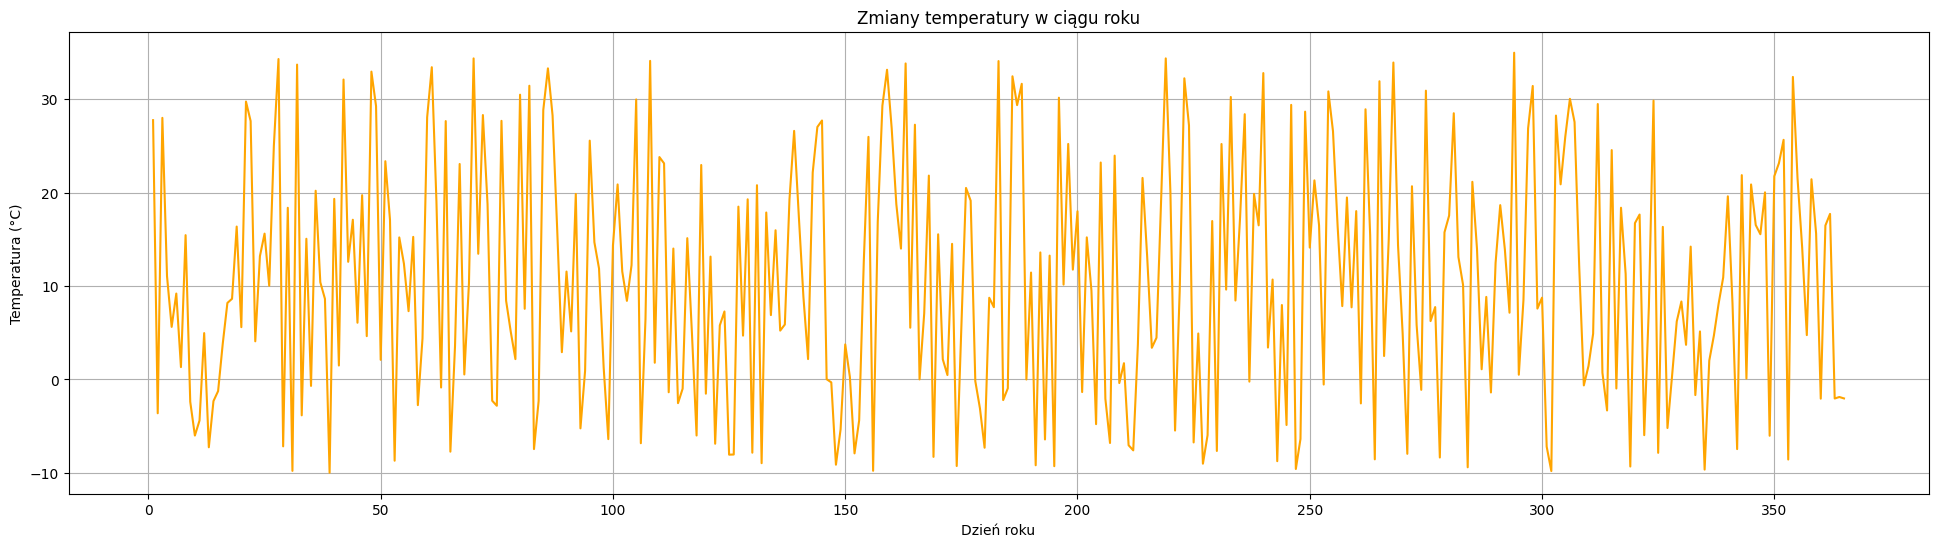

In [160]:
plt.figure(figsize=(24,6))
plt.plot(df.index, df['Temperatura'], color='orange')
plt.title('Zmiany temperatury w ciągu roku')
plt.xlabel('Dzień roku')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

##### 3.2 Histogram - Rozkład temperatur dla całego roku


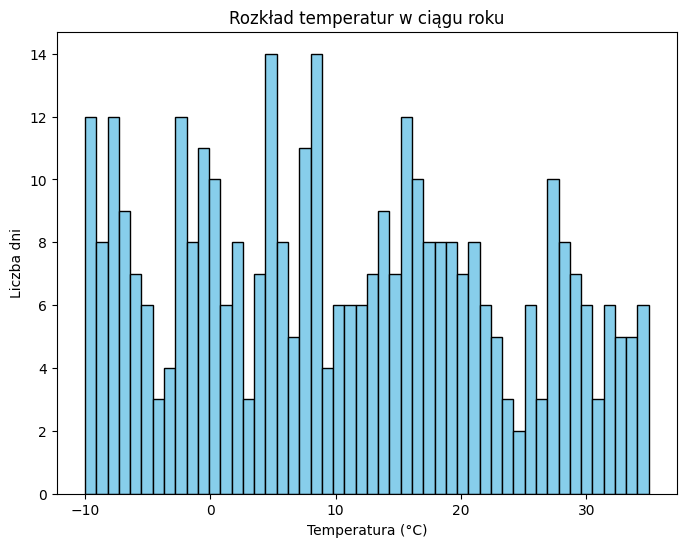

In [159]:
plt.figure(figsize=(8,6))
plt.hist(df['Temperatura'], bins=50, color='skyblue', edgecolor='black')
plt.title('Rozkład temperatur w ciągu roku')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Liczba dni')
plt.show()

##### 3.3 Wykres punktowy - Zależność między temperaturą a wilgotnością




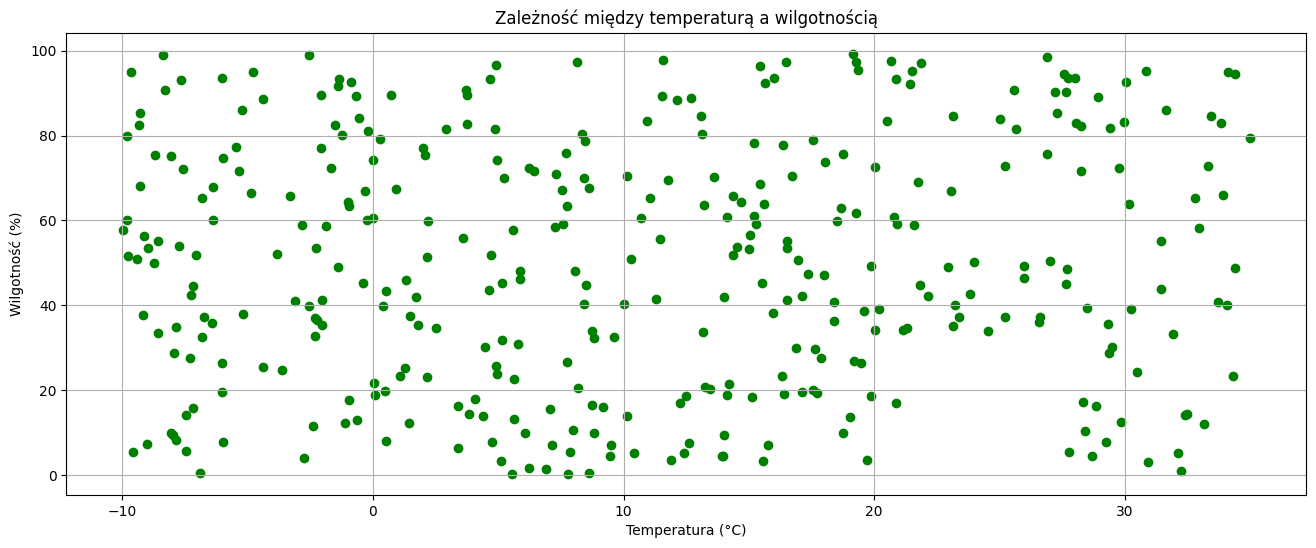

In [158]:
plt.figure(figsize=(16,6))
plt.scatter(df['Temperatura'], df['Wilgotność'], color='green')
plt.title('Zależność między temperaturą a wilgotnością')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Wilgotność (%)')
plt.grid(True)
plt.show()

##### 3.4 Wykres słupkowy - Sumy opadów dla każdej pory roku





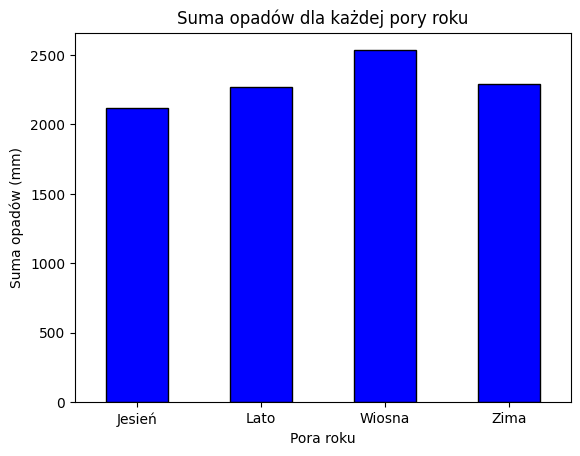

In [154]:
suma_opadow_pora_roku.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Suma opadów dla każdej pory roku')
plt.xlabel('Pora roku')
plt.ylabel('Suma opadów (mm)')
plt.xticks(rotation=0)
plt.show()

#### 4. Podsumowanie

##### 1. Jaki odsetek wszystkich dni stanowiły dni bez opadów?

In [ ]:


#----------------------------------------------------------------------
#dni_bez_opadow = df[df['Opady'] == 0].shape[0]
#procent_bez_opadow = (dni_bez_opadow / num_days) * 100                    
#print(f"\nOdsetek dni bez opadów: {procent_bez_opadow:.2f}%")
#----------------------------------------------------------------------



**Przy wyliczaniu dni bez opadow zawsze wyjdzie 0 (w aktualnej sytuacji szansa na wylosowanie równego 0 jest znikoma). 
Ponizej stworzylem kod, ktory uznaje wszystkie liczby "0,....." za 0 i zalicze je jako dzień bez opadów.**

In [ ]:
# Definiujemy mały próg dla opadów, poniżej którego uznajemy, że nie było opadów
epsilon = 1  # np. 1 mm

# Liczba dni bez opadów (opady mniejsze niż epsilon)
dni_bez_opadow = df[df['Opady'] < epsilon].shape[0]

# Obliczenie procentu dni bez opadów
procent_bez_opadow = (dni_bez_opadow / num_days) * 100

print(f"\nOdsetek dni bez opadów: {procent_bez_opadow:.2f}%")


##### 2. Kiedy występowały ekstremalne warunki pogodowe?

##### Najwyższe i najniższe wartości temperatury

In [137]:
print(f"\nNajwyższa temperatura: {max_temp:.2f}°C w dniu {dzien_max_temp}")
print(f"Najniższa temperatura: {min_temp:.2f}°C w dniu {dzien_min_temp}")


Najwyższa temperatura: 34.85°C w dniu 245
Najniższa temperatura: -9.99°C w dniu 74


##### Dni z silnym wiatrem (np. powyżej 80 km/h)

In [157]:
dni_silny_wiatr = df[df['Prędkość wiatru'] > 80]
liczba_dni_silny_wiatr = dni_silny_wiatr.shape[0]
print(f"\nLiczba dni z silnym wiatrem (>80 km/h): {liczba_dni_silny_wiatr}")
print("Dni z silnym wiatrem:")
print(dni_silny_wiatr[['Prędkość wiatru']])



Liczba dni z silnym wiatrem (>80 km/h): 87
Dni z silnym wiatrem:
       Prędkość wiatru
Dzień                 
3            89.989918
4            82.173444
6            94.902095
8            91.825294
9            96.730971
...                ...
340          90.143958
344          81.200230
350          80.958143
358          97.401161
365          96.565456

[87 rows x 1 columns]


#### Okresy długotrwałej suszy (np. co najmniej 7 kolejnych dni bez opadów)

In [155]:
# Tworzenie kolumny z informacją, czy był opad
df['Czy_opad'] = df['Opady'] == 0

# Szukanie okresów suszy
susza = df['Czy_opad']
susza_grupy = (susza != susza.shift()).cumsum()
susza_dlugosci = susza.groupby(susza_grupy).sum()

# Filtrujemy tylko te okresy suszy, które trwają co najmniej 7 dni
susza_okresy = susza_dlugosci[susza_dlugosci >= 7]

if not susza_okresy.empty:
    print("\nOkresy długotrwałej suszy (co najmniej 7 dni):")
    for idx in susza_okresy.index:
        maska = (susza_grupy == idx) & susza
        dni = df.index[maska]
        print(f"Od dnia {dni[0]} do dnia {dni[-1]} ({len(dni)} dni)")
else:
    print("\nBrak okresów długotrwałej suszy.")



Brak okresów długotrwałej suszy.
